In [1]:
# import libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
import pandas as pd
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DHANVANTRAO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DHANVANTRAO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DHANVANTRAO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Remove unnecessary columns and rename remaining columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"text"})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe()


,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

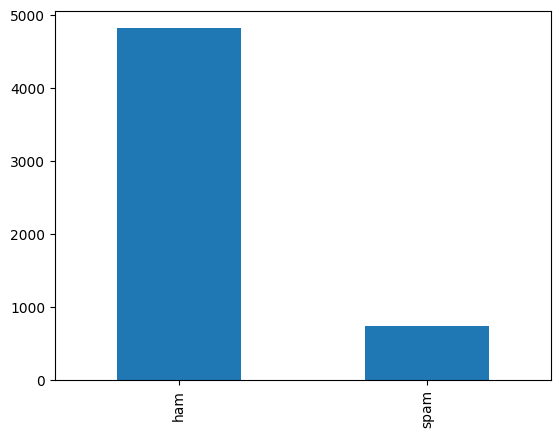

In [6]:
df.label.value_counts().plot.bar();

In [7]:
# labeled spam(1) and ham(0) 
df['spam'] = df['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# calculate length
df['length'] = df['text'].apply(len)
df.head()

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


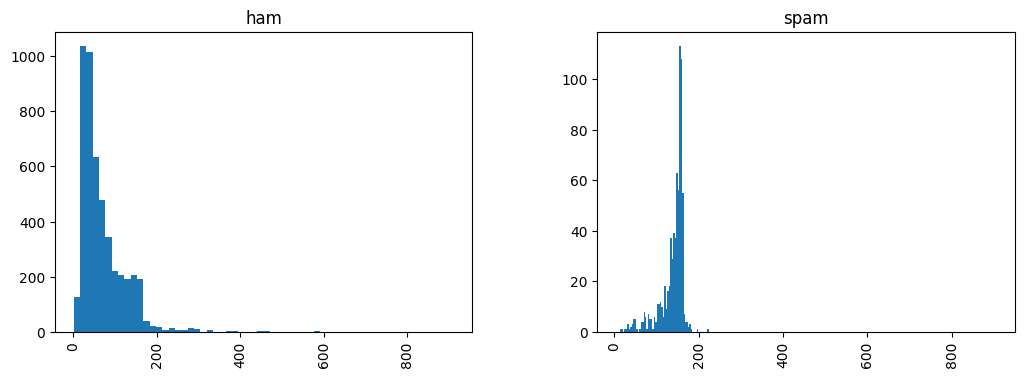

In [9]:
# virtulize messages
import matplotlib.pyplot as plt
df.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

In [10]:
# Remove punctuation and convert text to lowercase
import string
df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
df["text"] = df["text"].apply(lambda x: x.lower())
df.head()

,label,text,spam,length
0,ham,go until jurong point crazy available only in ...,0,111
1,ham,ok lar joking wif u oni,0,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155
3,ham,u dun say so early hor u c already then say,0,49
4,ham,nah i dont think he goes to usf he lives aroun...,0,61


In [11]:
# Tokenize text
df["tokens"] = df["text"].apply(nltk.word_tokenize)
df.head()

,label,text,spam,length,tokens
0,ham,go until jurong point crazy available only in ...,0,111,"[go, until, jurong, point, crazy, available, o..."
1,ham,ok lar joking wif u oni,0,29,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,u dun say so early hor u c already then say,0,49,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,nah i dont think he goes to usf he lives aroun...,0,61,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [12]:
# Remove stop words
stop_words = set(stopwords.words("english"))
df["no_stopwords"] = df["tokens"].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,label,text,spam,length,tokens,no_stopwords
0,ham,go until jurong point crazy available only in ...,0,111,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,0,29,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor u c already then say,0,49,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i dont think he goes to usf he lives aroun...,0,61,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [13]:
# Stem words
porter_stemmer = PorterStemmer()
df["stemmed"] = df["no_stopwords"].apply(lambda x: [porter_stemmer.stem(word) for word in x])
df.head()

,label,text,spam,length,tokens,no_stopwords,stemmed
0,ham,go until jurong point crazy available only in ...,0,111,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,ok lar joking wif u oni,0,29,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor u c already then say,0,49,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,nah i dont think he goes to usf he lives aroun...,0,61,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [14]:
# Lemmatize words
wordnet_lemmatizer = WordNetLemmatizer()
df["lemmatized"] = df["no_stopwords"].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])
df.head()

,label,text,spam,length,tokens,no_stopwords,stemmed,lemmatized
0,ham,go until jurong point crazy available only in ...,0,111,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,0,29,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor u c already then say,0,49,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i dont think he goes to usf he lives aroun...,0,61,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


In [15]:
# pos tagging
from textblob import TextBlob
# df['pos']= TextBlob(str(df['lemmatized']))
# df_pos.tags
df["pos"] =df["lemmatized"].apply(lambda x: [TextBlob(" ".join(x)).tags])
df.head()


,label,text,spam,length,tokens,no_stopwords,stemmed,lemmatized,pos
0,ham,go until jurong point crazy available only in ...,0,111,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...","[[(go, VB), (jurong, JJ), (point, NN), (crazy,..."
1,ham,ok lar joking wif u oni,0,29,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN)..."
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[[(free, JJ), (entry, NN), (2, CD), (wkly, JJ)..."
3,ham,u dun say so early hor u c already then say,0,49,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]","[[(u, JJ), (dun, NNS), (say, VBP), (early, JJ)..."
4,ham,nah i dont think he goes to usf he lives aroun...,0,61,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]","[[(nah, JJ), (dont, NN), (think, VBP), (go, VB..."


In [16]:
# import nltk
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# nltk.download('averaged_perceptron_tagger')

# # Define a function to convert part of speech tags to wordnet tags
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN



# # Perform POS tagging on the lemmatized text
# df["pos_tags"] = df["lemmatized"].apply(lambda x: nltk.pos_tag(x))

# # Convert the POS tags to wordnet tags
# df["wordnet_pos"] = df["pos_tags"].apply(lambda x: [(word, get_wordnet_pos(tag)) for word, tag in x])

# df.head()

In [17]:
# calculating TF-IDF
import numpy as np
# Calculate term frequency-inverse document frequency (TF-IDF)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["text"])
tfidf_matrix
np.shape(tfidf_matrix)

(5572, 9489)

In [18]:
print(tfidf_matrix)

  (0, 8970)	0.18533165691076994
  (0, 1175)	0.3250449070795673
  (0, 3854)	0.15270009724843112
  (0, 8294)	0.16130201278165904
  (0, 2220)	0.2745992510031893
  (0, 1882)	0.31029049851508855
  (0, 4862)	0.2745992510031893
  (0, 9217)	0.22415359492681128
  (0, 3894)	0.18091547501948232
  (0, 1884)	0.2745992510031893
  (0, 4412)	0.10738812897109133
  (0, 6051)	0.15692628542364076
  (0, 1414)	0.24717036276041154
  (0, 2504)	0.2517249054607048
  (0, 6455)	0.2542354766383449
  (0, 4704)	0.3250449070795673
  (0, 8713)	0.22901264860015585
  (0, 3797)	0.1477812426595277
  (1, 6045)	0.5462557824449175
  (1, 9110)	0.4313385731102942
  (1, 4672)	0.5233273701797004
  (1, 4901)	0.4080505634471753
  (1, 6011)	0.2741803362458879
  (2, 71)	0.2285734546867353
  (2, 1264)	0.1651212712540757
  :	:
  (5570, 3709)	0.26641542926787287
  (5570, 3114)	0.23615420421305283
  (5570, 7651)	0.19927105704143783
  (5570, 1912)	0.13359021497216086
  (5570, 8754)	0.20450406045006103
  (5570, 2798)	0.1812088983214566
  